**Linear Regression practice task**

In [162]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [163]:
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We need to find out if there is relationship between age and insurance cost.

Let's visulize this.

In [164]:
x = insurance.iloc[:,:1].values 
y = insurance.iloc[:, -1].values
print(y)

[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


Age is independent variable (x-axis), cost is dependent (y-axis). 

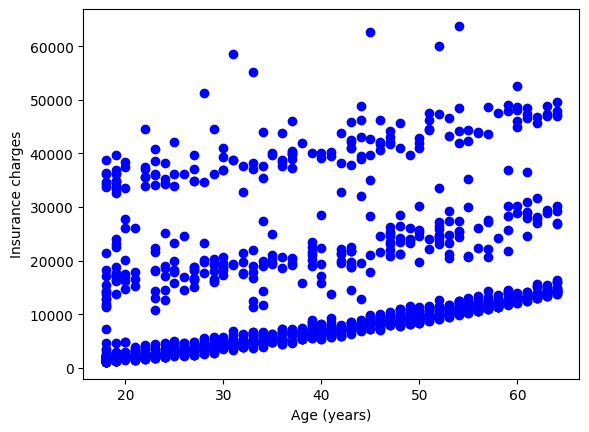

In [165]:
plt.scatter(x, y, color = 'b')
plt.xlabel('Age (years)')
plt.ylabel('Insurance charges')
plt.show()

According to the scatterplot we can say that there is a linear relationship between insurance cost and age, and this relationship is positive, meaning the cost rises as the age progresses.
However, there are definately more elements that affect the cost, and we can even approximately (just visually) divide all our spots into 3 groups.
For example, we see that different people of the same age can pay different amounts and the range is around 38000 on average (the difference between min and max on average for a certain age, determined just visually). 

Let's see how the linear regression model will look like on this scatterplot. 

In [166]:
insurance_cost_model = LinearRegression()
insurance_cost_model.fit(x, y)

LinearRegression()

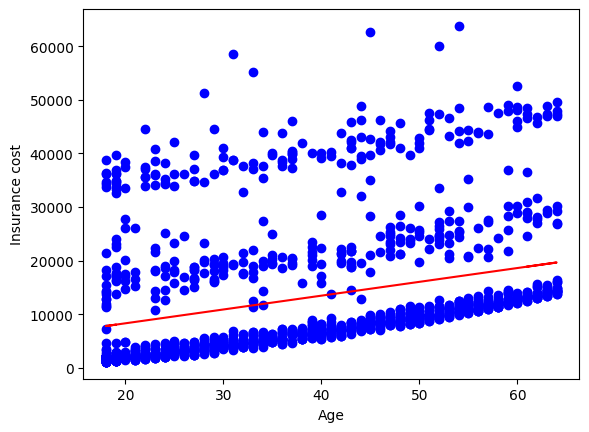

In [167]:
y_pred = insurance_cost_model.predict(x)
plt.scatter(x, y, color = 'b')
plt.plot(x, y_pred, color = 'r')
plt.xlabel('Age')
plt.ylabel('Insurance cost')
plt.show()

Just by looking on the graph, we can say that even if we predict the approximate cost of the insurance for the person of a certain age using our linear regression model, there is a still a probability that this person would have certain conditions that could increase their insurance charges. So the age is just one factor. 

Let's make a prediction based on our model for the person who is older than those we have in our dataset.

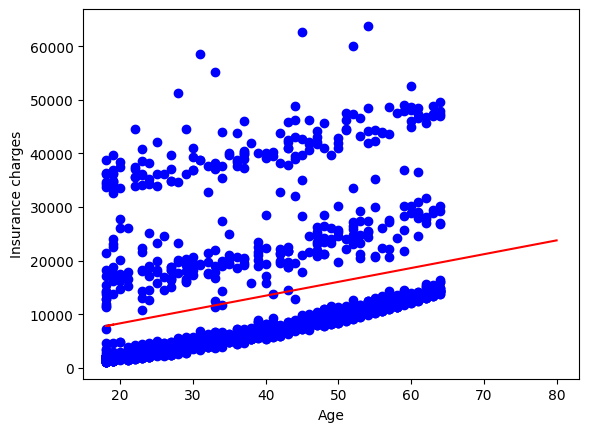

Insurance charges should be:  [23783.69449941]


In [168]:
# Predict an unknown value
unk_x = [[80]] 

x_pred = np.append(x, unk_x).reshape(-1,1)
y_pred = insurance_cost_model.predict(x_pred)

plt.scatter(x,y,color = 'b')
plt.plot(x_pred,y_pred,color = 'r')
plt.xlabel('Age')
plt.ylabel('Insurance charges')
plt.show()

print("Insurance charges should be: ", insurance_cost_model.predict(unk_x))

In [169]:
# just as an additional evaluation we can also measure the strength of our linear relationship using Pearsons correlation
from scipy.stats import pearsonr
corr, p = pearsonr(insurance.age, insurance.charges)
print(f'The Pearsons correlation is {corr}, according to which we can once more confirm that there is a positive linear correlation, however it is not very strong')

The Pearsons correlation is 0.29900819333064743, according to which we can once more confirm that there is a positive linear correlation, however it is not very strong


Additional task.

Let's see if there any linear relationship between bmi index and insurance charges.

In [170]:
x = insurance.iloc[:, 2:3].values #using '2:3' syntax to create 2d-array
y = insurance.iloc[:, -1].values

print(x)
print(y)

[[27.9 ]
 [33.77]
 [33.  ]
 ...
 [36.85]
 [25.8 ]
 [29.07]]
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


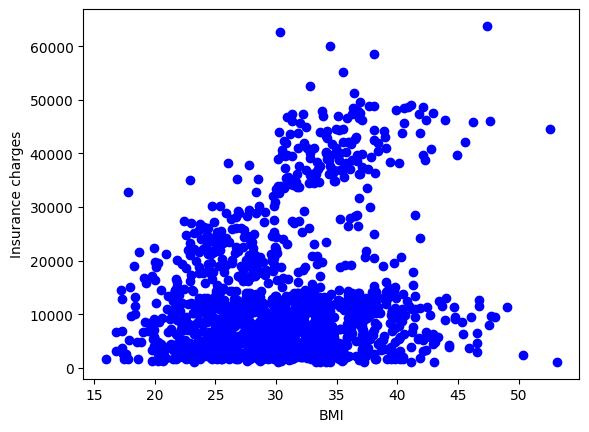

In [171]:
plt.scatter(x, y, color = 'b')
plt.xlabel('BMI')
plt.ylabel('Insurance charges')
plt.show()

In [172]:
# just for fun let's once again check for Pearsons correlation coefficient
corr, p = pearsonr(insurance.bmi, insurance.charges)
print(corr)

# and again not very strong, but still positive linear relationship 

0.19834096883362876


In [173]:
# building linear regression model
cost_bmi_model = LinearRegression()
cost_bmi_model.fit(x, y)

LinearRegression()

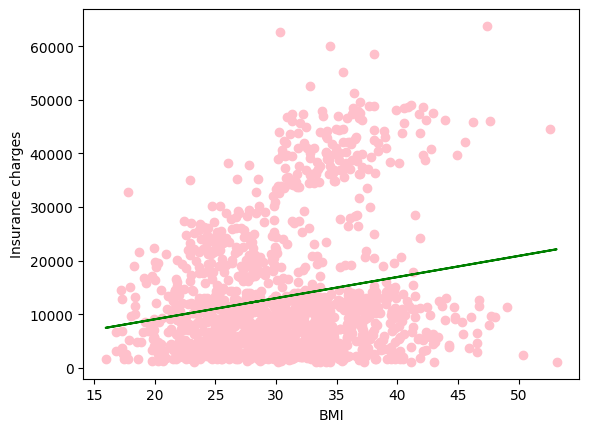

In [174]:
y_pred = cost_bmi_model.predict(x)

plt.scatter(x, y, color = 'pink')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('BMI')
plt.ylabel('Insurance charges')
plt.show()

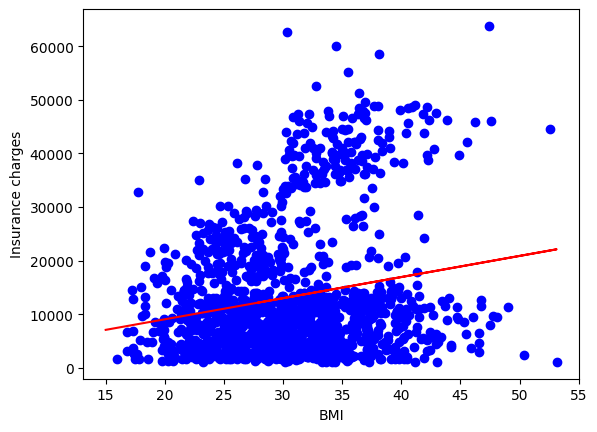

Insurance charges should be:  [7101.03267092]


In [175]:
# Predict an unknown value
unk_x = [[15]] #taking the bmi index smaller than those we have in a dataset

x_pred = np.append(x, unk_x).reshape(-1,1)
y_pred = cost_bmi_model.predict(x_pred)

plt.scatter(x,y,color = 'b')
plt.plot(x_pred,y_pred,color = 'r')
plt.xlabel('BMI')
plt.ylabel('Insurance charges')
plt.show()

print("Insurance charges should be: ", cost_bmi_model.predict(unk_x))